# Python solving with LeNet

In this example, we'll explore learning with Caffe in Python, using the fully-exposed `Solver` interface.

In [1]:
import os
os.chdir('..')

In [2]:
import sys
sys.path.insert(0, './python')
import caffe

from pylab import *
%matplotlib inline

We'll be running the provided LeNet example (make sure you've downloaded the data and created the databases, as below).

We need two external files to help out:
* the net prototxt, defining the architecture and pointing to the train/test data
* the solver prototxt, defining the learning parameters

We start with the net. We'll write the net in a succinct and natural way as Python code that serializes to Caffe's protobuf model format.

This network expects to read from pregenerated LMDBs, but reading directly from `ndarray`s is also possible using `MemoryDataLayer`.

In [3]:
from caffe import layers as L
from caffe import params as P



def deepCifar(lmdb, batch_size, mirror_on,crop):
    # our version of LeNet: a series of linear and simple nonlinear transformations
    transform_dict=dict(mirror=mirror_on, crop_size=crop,
                    mean_file='/home/share/storage/caffe-train/cifar10/lmdb/mean.binaryproto')

    n = caffe.NetSpec()
    n.data, n.label = L.Data(batch_size=batch_size, backend=P.Data.LMDB, source=lmdb,
                             transform_param=transform_dict, ntop=2)
    #n.data_drop=L.Dropout(n.data,dropout_ratio=0.2,in_place=True)
    
    n.conv1_1 = L.Convolution(n.data, kernel_size=3, num_output=256, pad=1,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.038))
    n.relu1_1 = L.ReLU(n.conv1_1, in_place=True)
    
    n.conv1_2 = L.Convolution(n.conv1_1, kernel_size=3, num_output=256, pad=1,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.028))
    n.relu1_2 = L.ReLU(n.conv1_2, in_place=True)
    
    n.conv1_3 = L.Convolution(n.conv1_2, kernel_size=3, num_output=256, pad=1,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.038))
    n.relu1_3 = L.ReLU(n.conv1_3, in_place=True)
    
    n.conv1_4 = L.Convolution(n.conv1_3, kernel_size=3, num_output=256, pad=1,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.028))
    n.relu1_4 = L.ReLU(n.conv1_4, in_place=True)
    
    n.conv1_5 = L.Convolution(n.conv1_4, kernel_size=3, num_output=256, pad=1,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.038))
    n.relu1_5 = L.ReLU(n.conv1_5, in_place=True)
    
    n.conv1_6 = L.Convolution(n.conv1_5, kernel_size=3, num_output=256, pad=1,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.028))
    n.relu1_6 = L.ReLU(n.conv1_6, in_place=True)
    n.conv1_7 = L.Convolution(n.conv1_6, kernel_size=3, num_output=256, pad=1,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.038))
    n.relu1_7 = L.ReLU(n.conv1_7, in_place=True)
    
    n.conv1_8 = L.Convolution(n.conv1_7, kernel_size=3, num_output=256, pad=1,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.028))
    n.relu1_8 = L.ReLU(n.conv1_8, in_place=True)
    
    
    
    n.pool1 = L.Pooling(n.conv1_8, kernel_size=3, stride=2, pad=2, pool=P.Pooling.MAX)
#    n.drop1=L.Dropout(n.pool1,dropout_ratio=0.5,in_place=False)
    
    
    n.conv2_1 = L.Convolution(n.pool1, kernel_size=3, num_output=256, pad=1,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.024))
    n.relu2_1 = L.ReLU(n.conv2_1, in_place=True)
    n.conv2_2 = L.Convolution(n.conv2_1, kernel_size=3, num_output=256, pad=1, 
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.024))
    n.relu2_2 = L.ReLU(n.conv2_2, in_place=True)
    
    n.pool2 = L.Pooling(n.conv2_2, kernel_size=3, stride=4, pool=P.Pooling.MAX)
    
    #n.drop2=L.Dropout(n.pool2,dropout_ratio=0.5,in_place=False)
    
    n.conv3_1 = L.Convolution(n.pool2, kernel_size=5, num_output=192, pad=2,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.034))
    
    n.conv3_1a = L.Convolution(n.pool2, kernel_size=5, num_output=192, pad=2,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.034))

    n.conv3_2 = L.Convolution(n.conv3_1, kernel_size=5, num_output=64, pad=2,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.032))
    n.relu3_2 = L.ReLU(n.conv3_2, in_place=True)
    
    n.conv3_2 = L.Convolution(n.conv3_1, kernel_size=5, num_output=64, pad=2,
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='msra', std=0.032))
    n.relu3_2 = L.ReLU(n.conv3_2, in_place=True)
    

      
    n.pool4 = L.Pooling(n.conv3_2, pool=P.Pooling.MAX, global_pooling=True)
    n.conv_clf = L.Convolution(n.pool4, kernel_size=1, num_output=10, 
                              param=[dict(decay_mult=1),dict(decay_mult=0)],
                              weight_filler=dict(type='gaussian', std=0.0015))
  
    n.loss = L.SoftmaxWithLoss(n.conv_clf, n.label)
    return n.to_proto()
    
with open('examples/cifar10/auto_train_xudongdeep_cifar_maxout.prototxt', 'w') as f:
    f.write(str(deepCifar('/home/share/storage/caffe-train/cifar10/lmdb/cifar10_train_lmdb', 32, True, 24)))
    
with open('examples/cifar10/auto_test_xudongdeep_cifar_maxout.prototxt', 'w') as f:
    f.write(str(deepCifar('/home/share/storage/caffe-train/cifar10/lmdb/cifar10_test_lmdb', 40, False, 32)))

The net has been written to disk in more verbose but human-readable serialization format using Google's protobuf library. You can read, write, and modify this description directly. Let's take a look at the train net.

In [4]:
!cat examples/cifar10/bn_auto_train_xudongdeep_cifar_maxout.prototxt

layer {
  name: "data"
  type: "Data"
  top: "data"
  top: "label"
  transform_param {
    mirror: true
    crop_size: 24
    mean_file: "/home/share/storage/caffe-train/cifar10/lmdb/mean.binaryproto"
  }
  data_param {
    source: "/home/share/storage/caffe-train/cifar10/lmdb/cifar10_train_lmdb"
    batch_size: 32
    backend: LMDB
  }
}
layer {
  name: "conv1_1"
  type: "Convolution"
  bottom: "data"
  top: "conv1_1"
  param {
    decay_mult: 1.0
  }
  param {
    decay_mult: 0.0
  }
  convolution_param {
    num_output: 256
    pad: 1
    kernel_size: 3
    weight_filler {
      type: "msra"
      std: 0.038
    }
  }
}
layer {
  name: "conv1_1_BN"
  type: "BN"
  bottom: "conv1_1"
  top: "conv1_1_BN"
  param {
    lr_mult: 1
    decay_mult: 1
  }
  param {
    lr_mult: 2
    decay_mult: 0
  }
  bn_param {
    scale_filler {
      type: "constant"
      value: 1.0000001
    }
    shift_filler {
      type: "constant"
      value: 1e-07
    }
  }
}
layer {
  name: "relu1_1"
  type: "R

Now let's see the learning parameters, which are also written as a `prototxt` file. We're using SGD with momentum, weight decay, and a specific learning rate schedule.

In [5]:
!cat examples/cifar10/bn_cifar_xudongdeep_maxout_autosolver.prototxt

test_net: "examples/cifar10/bn_auto_test_xudongdeep_cifar_maxout.prototxt"
train_net: "examples/cifar10/bn_auto_train_xudongdeep_cifar_maxout.prototxt"
display: 40
average_loss: 40
test_iter: 250
test_interval: 2000

base_lr: 0.01
gamma: 0.1
momentum: 0.9
weight_decay: 0.0005

lr_policy: "multistep"
#stepvalue: 50000
stepvalue: 70000
stepvalue: 80000
max_iter: 85000
clip_gradients: 10.0
snapshot: 20000
snapshot_prefix: "examples/cifar10/bn_cifar10_xudong_maxout"
solver_mode: GPU
solver_type: SGD
random_seed: 1700


Let's pick a device and load the solver. We'll use SGD (with momentum), but Adagrad and Nesterov's accelerated gradient are also available.

In [3]:
caffe.set_device(0)
caffe.set_mode_gpu()
solver = caffe.SGDSolver('/home/old-ufo/caffe-train/gln-cao/polysolver.prototxt')

To get an idea of the architecture of our net, we can check the dimensions of the intermediate features (blobs) and parameters (these will also be useful to refer to when manipulating data later).

(256, 3, 3, 3)
(256, 3, 3, 3)


In [5]:
# each output is (batch size, feature dim, spatial dim)
[(k, v.data.shape) for k, v in solver.net.blobs.items()]

[('data', (1, 3, 227, 227)),
 ('label', (1,)),
 ('label_data_1_split_0', (1,)),
 ('label_data_1_split_1', (1,)),
 ('label_data_1_split_2', (1,)),
 ('label_data_1_split_3', (1,)),
 ('label_data_1_split_4', (1,)),
 ('label_data_1_split_5', (1,)),
 ('label_data_1_split_6', (1,)),
 ('label_data_1_split_7', (1,)),
 ('label_data_1_split_8', (1,)),
 ('label_data_1_split_9', (1,)),
 ('label_data_1_split_10', (1,)),
 ('label_data_1_split_11', (1,)),
 ('conv1_1', (1, 32, 221, 221)),
 ('conv1_1_BN', (1, 32, 221, 221)),
 ('conv1_2', (1, 32, 221, 221)),
 ('conv1_2_BN', (1, 32, 221, 221)),
 ('conv1_3', (1, 32, 221, 221)),
 ('conv1_3_BN', (1, 32, 221, 221)),
 ('conv1_4', (1, 32, 221, 221)),
 ('conv1_4_BN', (1, 32, 221, 221)),
 ('conv1_5', (1, 48, 221, 221)),
 ('conv1_5_BN', (1, 48, 221, 221)),
 ('pool1_3x3_s2', (1, 48, 110, 110)),
 ('conv2_3x3_reduce', (1, 64, 110, 110)),
 ('conv2_3x3_reduce_BN', (1, 64, 110, 110)),
 ('conv2_3x3', (1, 192, 110, 110)),
 ('conv2_3x3_BN', (1, 192, 110, 110)),
 ('conv2_1

In [7]:
# just print the weight sizes (not biases)
[(k, v[0].data.shape) for k, v in solver.net.params.items()]


[('conv1_1', (256, 3, 3, 3)),
 ('conv1_1_BN', (1, 256, 1, 1)),
 ('conv1_2', (256, 256, 3, 3)),
 ('conv1_2_BN', (1, 256, 1, 1)),
 ('conv1_3', (256, 256, 3, 3)),
 ('conv1_3_BN', (1, 256, 1, 1)),
 ('conv1_4', (256, 256, 3, 3)),
 ('conv1_4_BN', (1, 256, 1, 1)),
 ('conv1_5', (256, 256, 3, 3)),
 ('conv1_5_BN', (1, 256, 1, 1)),
 ('conv1_6', (256, 256, 3, 3)),
 ('conv1_6_BN', (1, 256, 1, 1)),
 ('conv1_7', (256, 256, 3, 3)),
 ('conv1_7_BN', (1, 256, 1, 1)),
 ('conv1_8', (256, 256, 3, 3)),
 ('conv1_8_BN', (1, 256, 1, 1)),
 ('conv2_1', (256, 256, 3, 3)),
 ('conv2_1_BN', (1, 256, 1, 1)),
 ('conv2_2', (256, 256, 3, 3)),
 ('conv2_2_BN', (1, 256, 1, 1)),
 ('conv3_1', (192, 256, 5, 5)),
 ('conv3_1_BN', (1, 192, 1, 1)),
 ('conv3_2', (64, 192, 5, 5)),
 ('conv3_2_BN', (1, 64, 1, 1)),
 ('conv_clf', (10, 64, 1, 1)),
 ('conv_clf_BN', (1, 10, 1, 1))]

In [ ]:
print solver.net.params[k][0].data[:]


In [4]:
#Orthogonalization
import numpy as np


#from random import get_rng

def sample(shape):
        if len(shape) < 2:
            raise RuntimeError("Only shapes of length 2 or more are "
                               "supported.")

        flat_shape = (shape[0], np.prod(shape[1:]))
        a = standard_normal(flat_shape)
        u, _, v = np.linalg.svd(a, full_matrices=False)
        q = u if u.shape == flat_shape else v
        q = q.reshape(shape)
        return sqrt(2) * q
    
for k,v in solver.net.params.iteritems():
    print k, v[0].data.shape
    if k == 'conv_clf':
        continue
    if "_BN" in k:
        print "Skip BN"
        continue
    if "relu" in k:
        print "Skip relu"
        continue
        
    ll=sample(v[0].data[:].shape)
#    print 'before'
    solver.net.params[k][0].data[:]=ll
#    print 'after'
#    print solver.net.params[k][0].data
#    break
    
#    break
#net.params['conv'][1].data[0]

conv1_1 (32, 3, 7, 7)
conv1_1_BN (1, 32, 1, 1)
Skip BN
conv1_2 (32, 32, 3, 3)
conv1_2_BN (1, 32, 1, 1)
Skip BN
conv1_3 (32, 32, 3, 3)
conv1_3_BN (1, 32, 1, 1)
Skip BN
conv1_4 (32, 32, 3, 3)
conv1_4_BN (1, 32, 1, 1)
Skip BN
conv1_5 (48, 32, 3, 3)
conv1_5_BN (1, 48, 1, 1)
Skip BN
conv2_3x3_reduce (64, 48, 1, 1)
conv2_relu_3x3_reduce (64,)
Skip relu
conv2_3x3_reduce_BN (1, 64, 1, 1)
Skip BN
conv2_3x3 (192, 64, 3, 3)
conv2_relu_3x3 (192,)
Skip relu
conv2_3x3_BN (1, 192, 1, 1)
Skip BN
conv2_1_3x3_reduce (64, 192, 1, 1)
conv2_1_relu_3x3_reduce (64,)
Skip relu
conv2_1_3x3_reduce_BN (1, 64, 1, 1)
Skip BN
conv2_1_3x3 (192, 64, 3, 3)
conv2_1_relu_3x3 (192,)
Skip relu
conv2_1_3x3_BN (1, 192, 1, 1)
Skip BN
inception_3a_1x1 (64, 192, 1, 1)
inception_3a_relu_1x1 (64,)
Skip relu
inception_3a_1x1_BN (1, 64, 1, 1)
Skip BN
inception_3a_3x3_reduce (96, 192, 1, 1)
inception_3a_relu_3x3_reduce (96,)
Skip relu
inception_3a_3x3_reduce_BN (1, 96, 1, 1)
Skip BN
inception_3a_3x3 (128, 96, 3, 3)
inception_3a_rel

Before taking off, let's check that everything is loaded as we expect. We'll run a forward pass on the train and test nets and check that they contain our data.

In [11]:
solver.net.forward()  # train net
solver.test_nets[0].forward()  # test net (there can be more than one)

{'loss': array(2.3018879890441895, dtype=float32)}

In [30]:
# we use a little trick to tile the first eight images
#imshow(solver.net.blobs['data'].data[:8, 0].transpose(1, 0, 2).reshape(32, 8*32), cmap='gray')
#print solver.net.blobs['label'].data[:8]

In [31]:
#imshow(solver.test_nets[0].blobs['data'].data[:8, 0].transpose(1, 0, 2).reshape(28, 8*28), cmap='gray')
#print solver.test_nets[0].blobs['label'].data[:8]

Both train and test nets seem to be loading data, and to have correct labels.

Let's take one step of (minibatch) SGD and see what happens.

In [5]:
solver.step(1)

Do we have gradients propagating through our filters? Let's see the updates to the first layer, shown here as a $4 \times 5$ grid of $5 \times 5$ filters.

In [33]:
#imshow(solver.net.params['conv1_1'][0].diff[:, 0].reshape(4, 5, 5, 5)
#       .transpose(0, 2, 1, 3).reshape(4*5, 5*5), cmap='gray')

Something is happening. Let's run the net for a while, keeping track of a few things as it goes.
Note that this process will be the same as if training through the `caffe` binary. In particular:
* logging will continue to happen as normal
* snapshots will be taken at the interval specified in the solver prototxt (here, every 5000 iterations)
* testing will happen at the interval specified (here, every 500 iterations)

Since we have control of the loop in Python, we're free to compute additional things as we go, as we show below. We can do many other things as well, for example:
* write a custom stopping criterion
* change the solving process by updating the net in the loop

In [5]:
niter = 85000
test_interval = 1000
# losses will also be stored in the log
train_loss_1 = zeros(niter)
test_acc_1 = zeros(int(np.ceil(niter / test_interval)))
output = zeros((niter, 8, 10,1,1))
it=0
train_loss_interval=40;

In [6]:
%%time
niter = 2
test_interval = 1000
# losses will also be stored in the log
train_loss_1 = zeros(niter)
test_acc_1 = zeros(int(np.ceil(niter / test_interval)))
output = zeros((niter, 8, 1000,1,1))
it=0
train_loss_interval=40;
# the main solver loop

for it1 in range(niter):
    it+=1
    solver.step(1)  # SGD by Caffe
    
    # store the train loss
    train_loss_1[it] = solver.net.blobs['loss'].data
 #   if it % train_loss_interval == 0:
 #       print 'Iteration', it, 'train loss = ',train_loss_1[it]

    # store the output on the first test batch
    # (start the forward pass at conv1 to avoid loading new data)
  #  solver.test_nets[0].forward(start='conv1_1')
  #  output[it] = solver.test_nets[0].blobs['conv_clf'].data[:8]
    
    # run a full test every so often
    # (Caffe can also do this for us and write to a log, but we show here
    #  how to do it directly in Python, where more complicated things are easier.)
  #  if it % test_interval == 0:
  #      print 'Iteration', it, 'testing...'
  #      correct = 0
  #      for test_it in range(250):
  #          solver.test_nets[0].forward()
  #          correct += sum(solver.test_nets[0].blobs['conv_clf'].data.argmax(1).squeeze() 
  #                         == solver.test_nets[0].blobs['label'].data.astype(int))
  #      test_acc_1[it // test_interval] = correct / 1e4
  #      print "acc=" + str(test_acc_1[it // test_interval])

KeyError: 'loss'

In [ ]:
%%time

# the main solver loop

for it1 in range(niter-13000):
    it+=1
    solver.step(1)  # SGD by Caffe
    
    # store the train loss
    train_loss_1[it] = solver.net.blobs['loss'].data
    if it % train_loss_interval == 0:
        print 'Iteration', it, 'train loss = ',train_loss_1[it]

    # store the output on the first test batch
    # (start the forward pass at conv1 to avoid loading new data)
    solver.test_nets[0].forward(start='conv1_1')
    output[it] = solver.test_nets[0].blobs['conv_clf'].data[:8]
    
    # run a full test every so often
    # (Caffe can also do this for us and write to a log, but we show here
    #  how to do it directly in Python, where more complicated things are easier.)
    if it % test_interval == 0:
        print 'Iteration', it, 'testing...'
        correct = 0
        for test_it in range(250):
            solver.test_nets[0].forward()
            correct += sum(solver.test_nets[0].blobs['conv_clf'].data.argmax(1).squeeze() 
                           == solver.test_nets[0].blobs['label'].data.astype(int))
        test_acc_1[it // test_interval] = correct / 1e4
        print "acc=" + str(test_acc_1[it // test_interval])

In [13]:
solver.test_nets[0].blobs['conv_clf'].data.shape

(40, 10, 1, 1)

In [13]:
solver.

AttributeError: 'SGDSolver' object has no attribute 'stepvalue'

In [14]:
print max(test_acc)


NameError: name 'test_acc' is not defined

In [ ]:
correct = 0
for test_it in range(100):
    solver.test_nets[1].forward()
    correct += sum(solver.test_nets[1].blobs['conv_clf'].data.argmax(1).squeeze() 
                   == solver.test_nets[1].blobs['label'].data.astype(int))
print "acc=" + str(correct/ 1e4)

Let's plot the train loss and test accuracy.

(0, 13000)

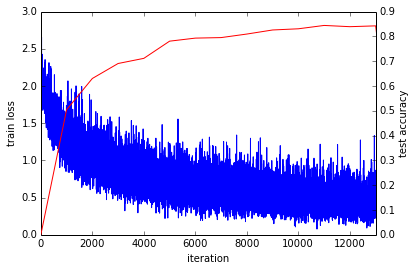

In [10]:
_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss_1)
ax2.plot(test_interval * arange(len(test_acc_1)), test_acc_1, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_ylim((0,0.9))
ax2.set_xlim((0,13000))

(0, 0.9)

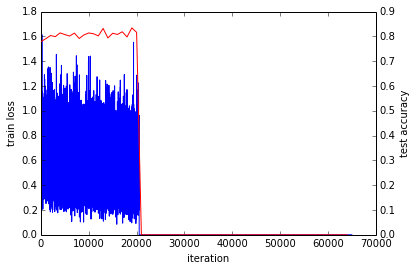

In [57]:
_, ax1 = subplots()
ax2 = ax1.twinx()
ax1.plot(arange(niter), train_loss_1)
ax2.plot(test_interval * arange(len(test_acc_1)), test_acc_1, 'r')
ax1.set_xlabel('iteration')
ax1.set_ylabel('train loss')
ax2.set_ylabel('test accuracy')
ax2.set_ylim((0,0.9))

In [16]:
print max(test_acc)

10.6641


The loss seems to have dropped quickly and coverged (except for stochasticity), while the accuracy rose correspondingly. Hooray!

Since we saved the results on the first test batch, we can watch how our prediction scores evolved. We'll plot time on the $x$ axis and each possible label on the $y$, with lightness indicating confidence.

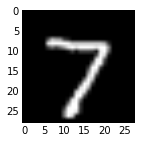

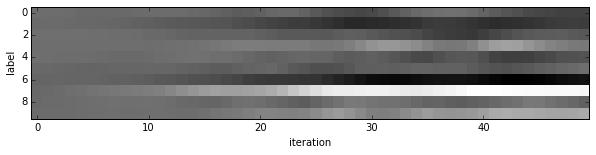

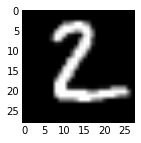

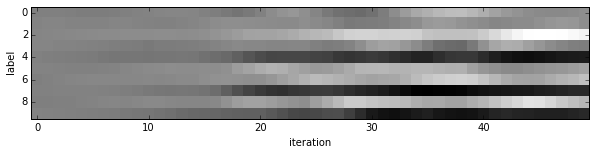

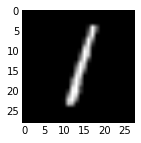

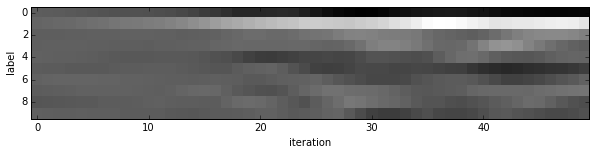

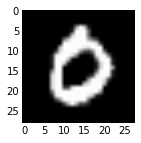

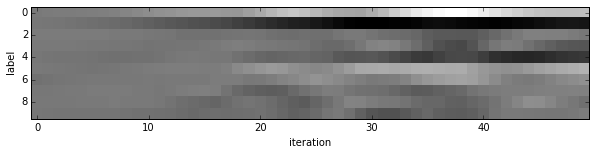

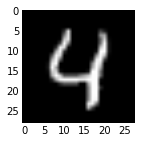

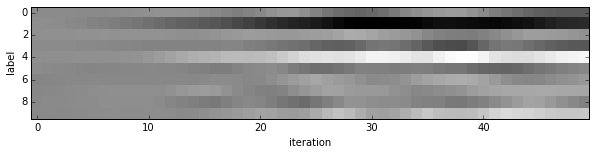

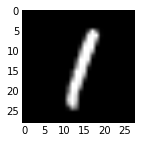

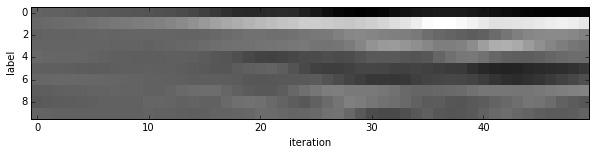

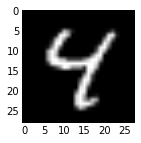

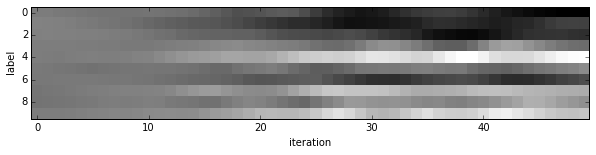

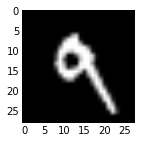

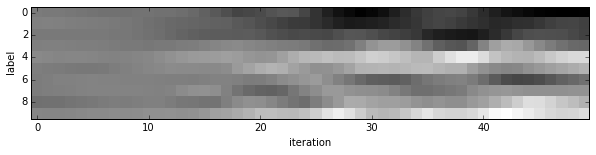

In [17]:
for i in range(8):
    figure(figsize=(2, 2))
    imshow(solver.test_nets[0].blobs['data'].data[i, 0], cmap='gray')
    figure(figsize=(10, 2))
    imshow(output[:50, i].T, interpolation='nearest', cmap='gray')
    xlabel('iteration')
    ylabel('label')

We started with little idea about any of these digits, and ended up with correct classifications for each. If you've been following along, you'll see the last digit is the most difficult, a slanted "9" that's (understandably) most confused with "4".

Note that these are the "raw" output scores rather than the softmax-computed probability vectors. The latter, shown below, make it easier to see the confidence of our net (but harder to see the scores for less likely digits).

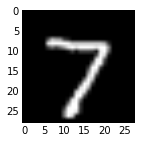

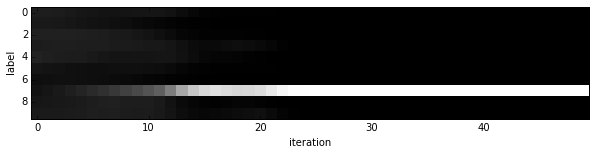

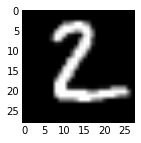

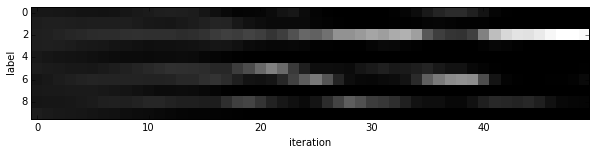

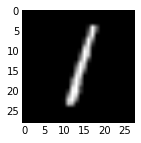

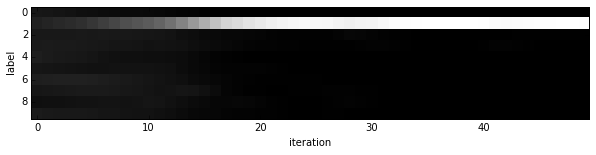

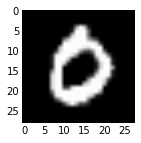

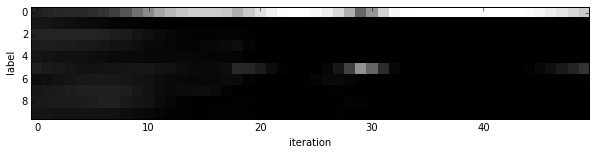

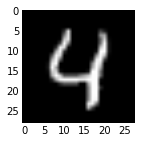

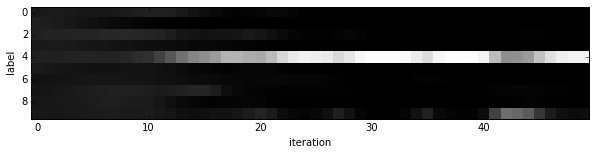

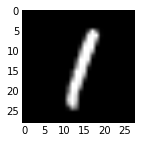

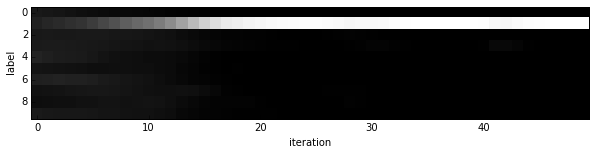

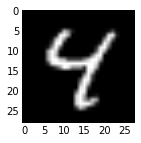

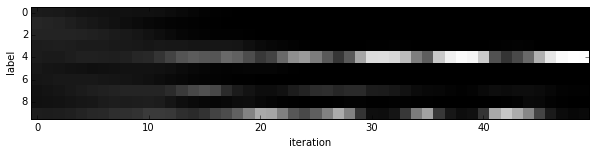

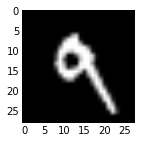

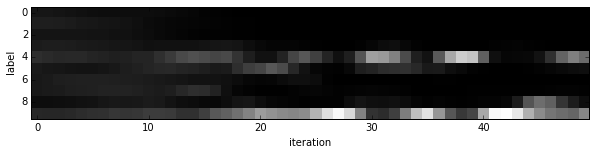

In [18]:
for i in range(8):
    figure(figsize=(2, 2))
    imshow(solver.test_nets[0].blobs['data'].data[i, 0], cmap='gray')
    figure(figsize=(10, 2))
    imshow(exp(output[:50, i].T) / exp(output[:50, i].T).sum(0), interpolation='nearest', cmap='gray')
    xlabel('iteration')
    ylabel('label')